In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import torch
import pytorch_lightning as pl
from pytorch_lightning import Trainer
from torch.utils.data import Dataset, DataLoader

from mpl_toolkits.mplot3d import Axes3D
%matplotlib notebook

In [2]:
from scripts.AutoEncoder import AutoEncoder, AutoEncoderDataset
from scripts.utils import train_keys, target_keys

In [3]:
full_test = "/share/rcifdata/jbarr/UKAEAGroupProject/data/test_data.pkl"
test = "/share/rcifdata/jbarr/UKAEAGroupProject/data/QLKNN_test_data.pkl"

df_full_test = pd.read_pickle(full_test)
target = df_full_test['Target']
df_full_test = df_full_test[train_keys]

df_test = pd.read_pickle(test)
df_test = df_test[train_keys]

n = 50_000

## Model 1 - AE trained on inputs that give outputs

In [4]:
path = "/share/rcifdata/jbarr/UKAEAGroupProject/logs/AutoEncoder/Run-1/Run-1/experiment_name=0-epoch=24-val_loss=0.30.ckpt"

model = AutoEncoder.load_from_checkpoint(path, n_input = 15, batch_size = 2048, epochs = 100, learning_rate = 0.002)
encoder = model.encoder

### Evaluate on inputs that give outputs

In [5]:
data_test = torch.from_numpy(df_test.values).float()
outputs_test = encoder.forward(data_test).detach().numpy()

<IPython.core.display.Javascript object>


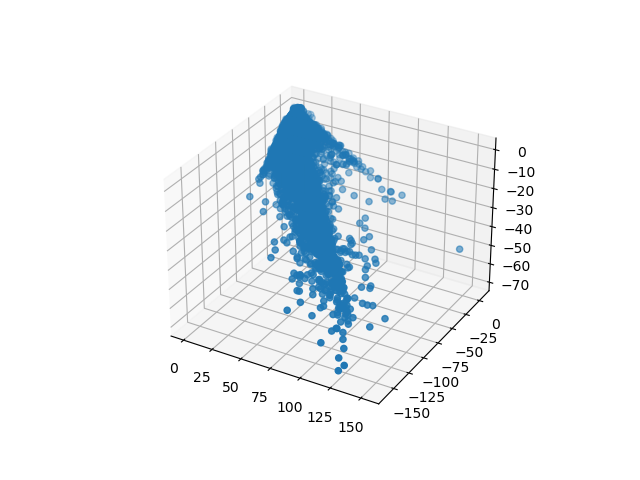

In [6]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(outputs_test[:n,0], outputs_test[:n,1],outputs_test[:n,2])
fig.show()

<IPython.core.display.Javascript object>


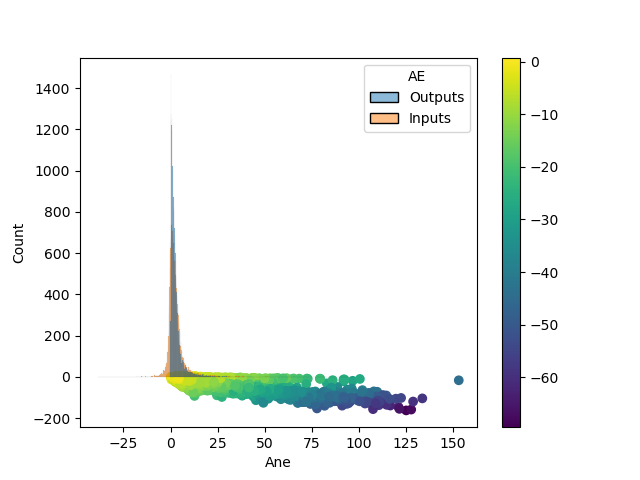

In [7]:
plt.figure()

sc = plt.scatter(outputs_test[:n,0], outputs_test[:n,1], c = outputs_test[:n,2])
plt.colorbar(sc)
plt.show()

### Plot  input and output distributions

In [8]:
AE_output = model.forward(data_test).detach().numpy()
df_ae_output = pd.DataFrame(AE_output, columns = train_keys)
df_ae_output['AE'] = 'Outputs'

df_test_tmp = df_test
df_test_tmp['AE'] = 'Inputs'

In [22]:
df_compare = pd.concat([df_ae_output, df_test_tmp], ignore_index=True)
df_compare_sample = df_compare.sample(n)

<IPython.core.display.Javascript object>


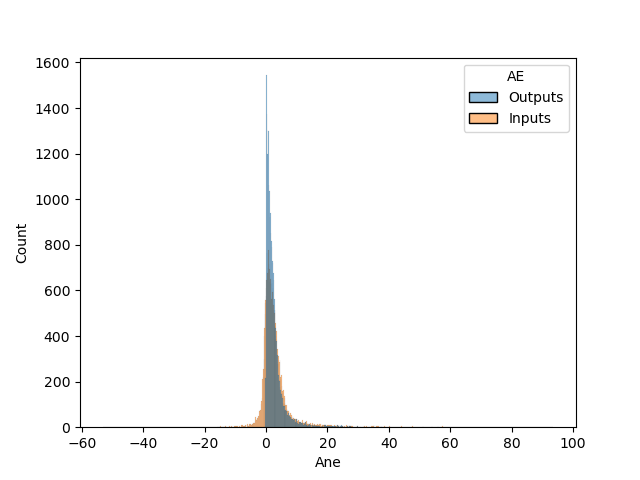

<IPython.core.display.Javascript object>


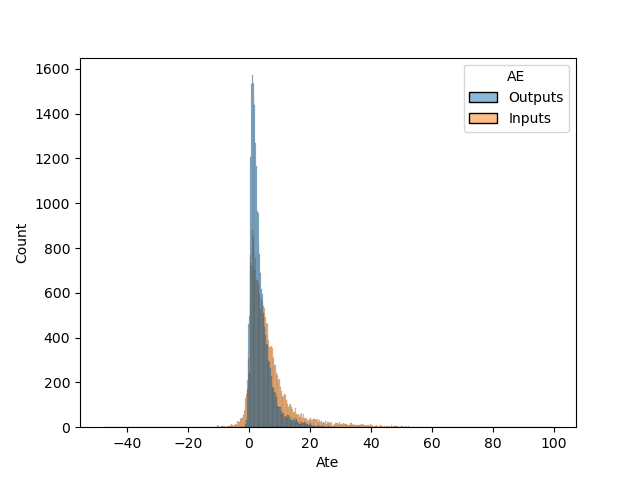

<IPython.core.display.Javascript object>


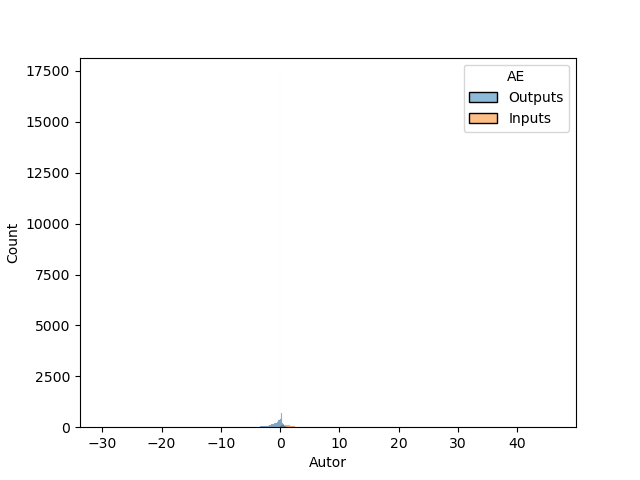

<IPython.core.display.Javascript object>


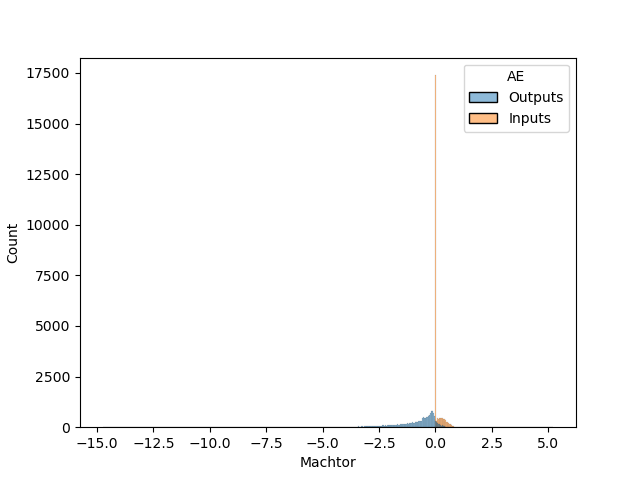

<IPython.core.display.Javascript object>


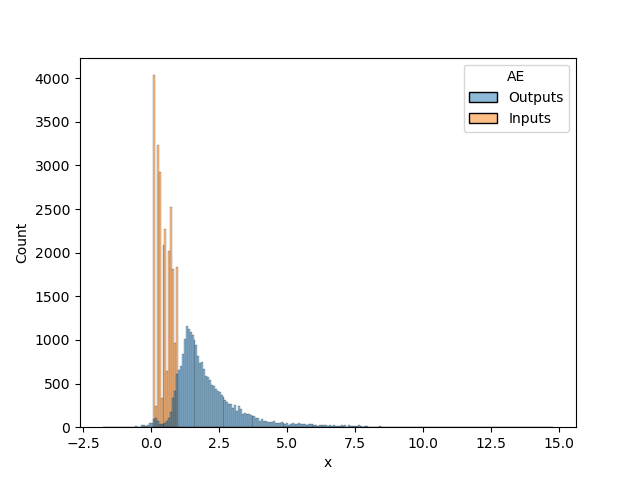

<IPython.core.display.Javascript object>


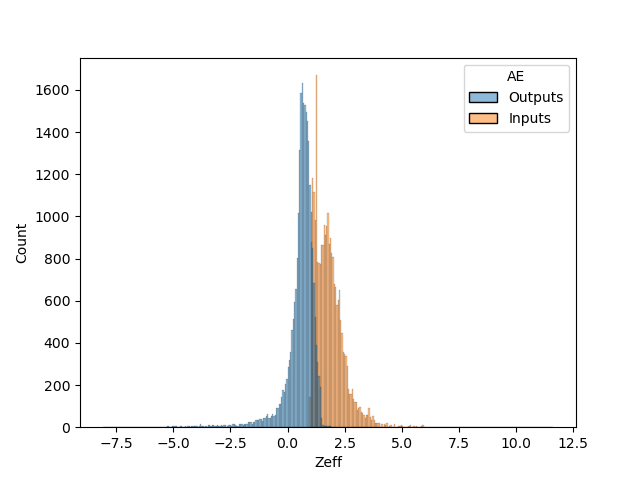

<IPython.core.display.Javascript object>


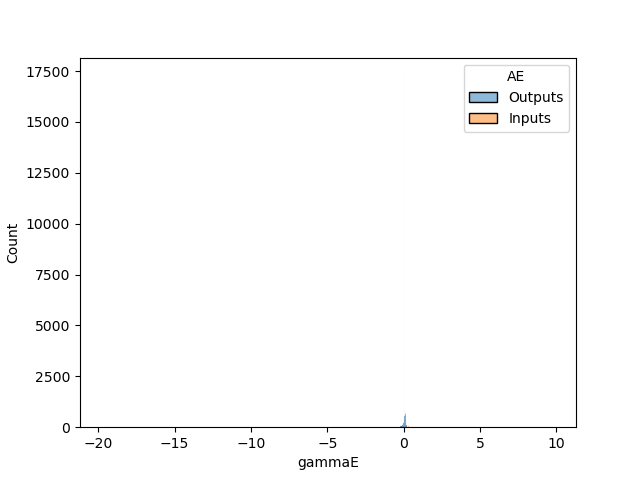

<IPython.core.display.Javascript object>


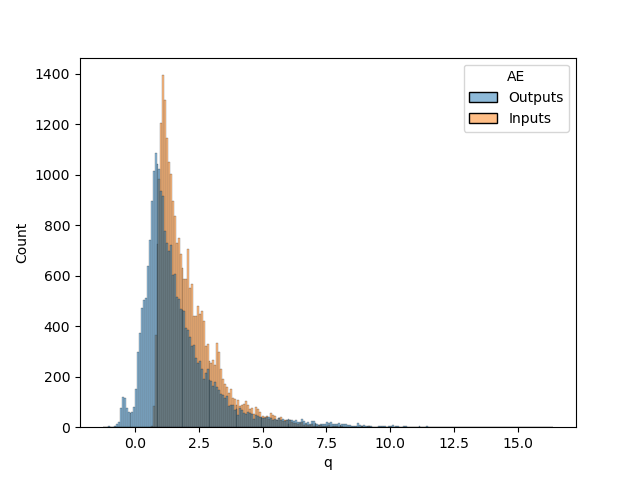

<IPython.core.display.Javascript object>


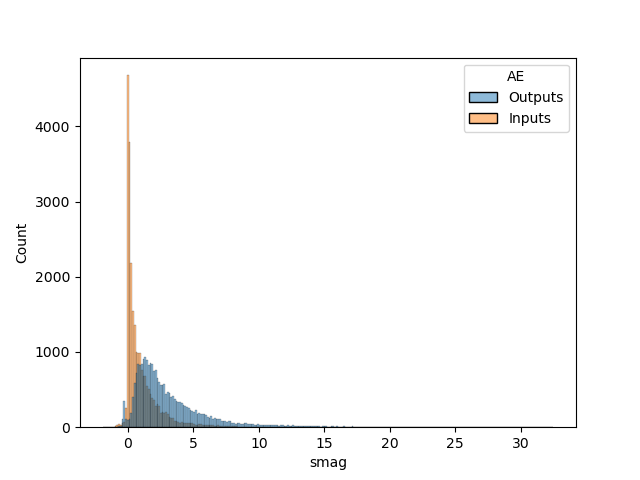

<IPython.core.display.Javascript object>


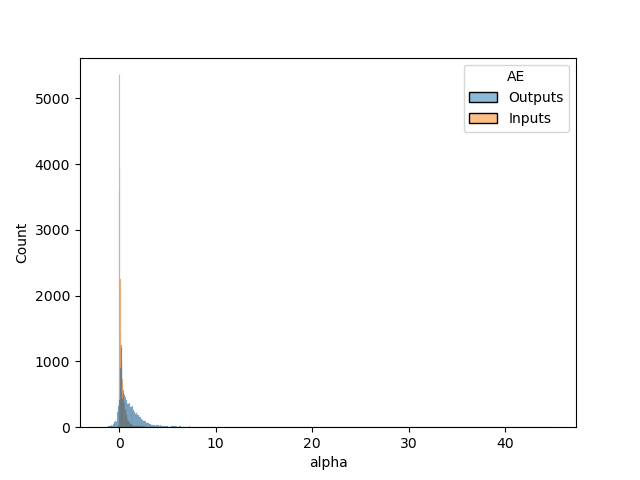

<IPython.core.display.Javascript object>


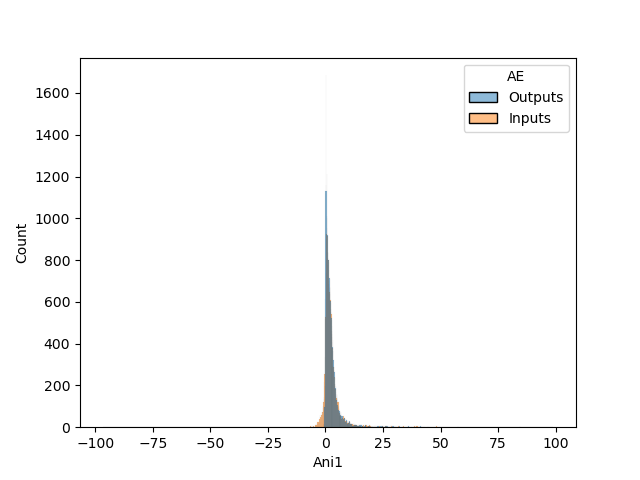

<IPython.core.display.Javascript object>


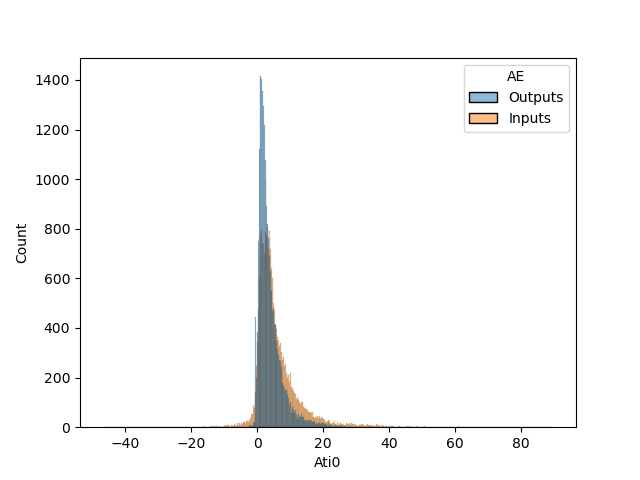

<IPython.core.display.Javascript object>


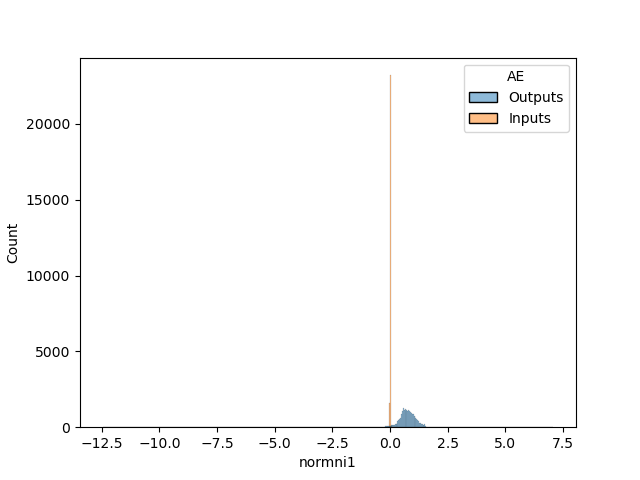

<IPython.core.display.Javascript object>


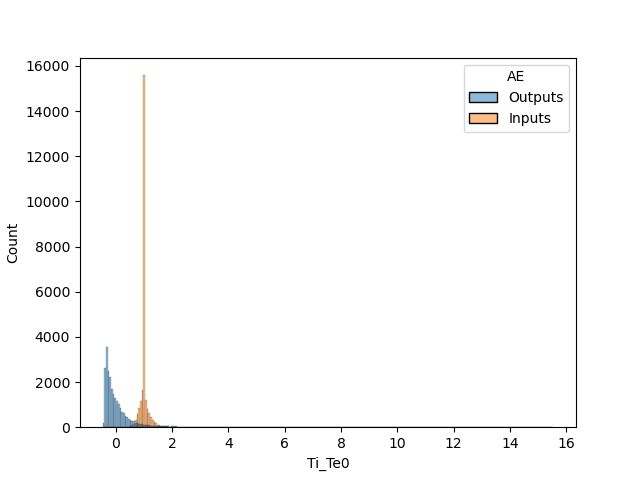

<IPython.core.display.Javascript object>


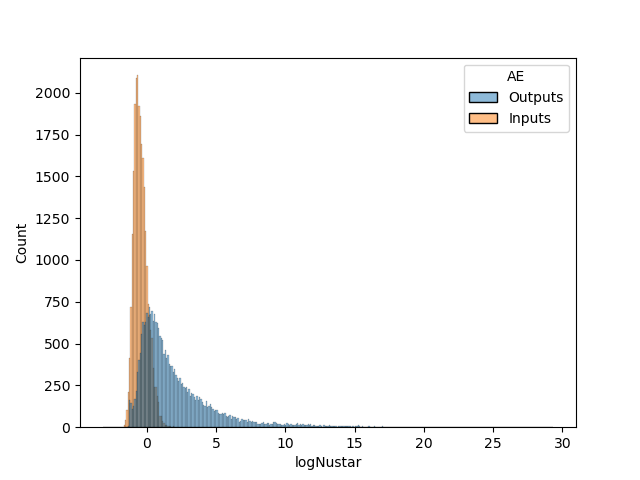

In [23]:
for i in train_keys:
    plt.figure()
    sns.histplot(data = df_compare_sample, x = i, hue = "AE");
    plt.xlabel(i)

### Evaluate on all inputs

In [29]:
data_test_full = torch.from_numpy(df_full_test.values).float()
outputs_test_full = encoder.forward(data_test_full).detach().numpy()

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(outputs_test_full[:n,0], outputs_test_full[:n,1],outputs_test_full[:n,2])
fig.show()

In [ ]:
plt.figure()
sc = plt.scatter(outputs_test_full[:n,0], outputs_test_full[:n,1], c = outputs_test_full[:n,2])
plt.colorbar(sc)
plt.show()

## Model 2 - AE trained on all inputs

In [ ]:
path = "/share/rcifdata/jbarr/UKAEAGroupProject/logs/AutoEncoder/Run-1/Run-1/experiment_name=0-epoch=24-val_loss=0.30.ckpt"

model_full = AutoEncoder.load_from_checkpoint(path, n_input = 15, batch_size = 2048, epochs = 100, learning_rate = 0.002)
encoder_full = model_full.encoder

### Evaluate on inputs that give outputs

In [ ]:
outputs_encoder_full_test = encoder_full.forward(data_test).detach().numpy()

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(outputs_encoder_full_test[:n,0], outputs_encoder_full_test[:n,1],
           outputs_encoder_full_test[:n,2])
fig.show()

### Evaluate on all inputs

In [ ]:
outputs_encoder_full_test_full = encoder_full.forward(data_test_full).detach().numpy()

In [ ]:
plt.figure()
plt.hist(outputs_encoder_full_test_full[:n,0], bins = 100, range = (0,75));
plt.figure()
plt.hist(outputs_encoder_full_test_full[:n,1], bins = 100, range = (-150,10));
plt.figure()
plt.hist(outputs_encoder_full_test_full[:n,2], bins = 100, range = (0,5));

In [ ]:
fig = plt.figure()
# n = 100_000
ax = fig.add_subplot(111, projection='3d')
ax.scatter(outputs_encoder_full_test_full[:n,0], outputs_encoder_full_test_full[:n,1],
           outputs_encoder_full_test_full[:n,2], c = target[:n])

fig.show()

## Model with 2D Latent Space

In [15]:
path = "/share/rcifdata/jbarr/UKAEAGroupProject/logs/AutoEncoder/Run-3/Run-3/experiment_name=0-epoch=27-val_loss=0.35.ckpt"
model_2d = AutoEncoder.load_from_checkpoint(path, n_input = 15, latent_dims = 2, batch_size = 2048, epochs = 100, learning_rate = 0.002)
encoder_2d = model_2d.encoder

In [24]:
outputs_2d = encoder_2d.forward(data_test).detach().numpy()

<IPython.core.display.Javascript object>


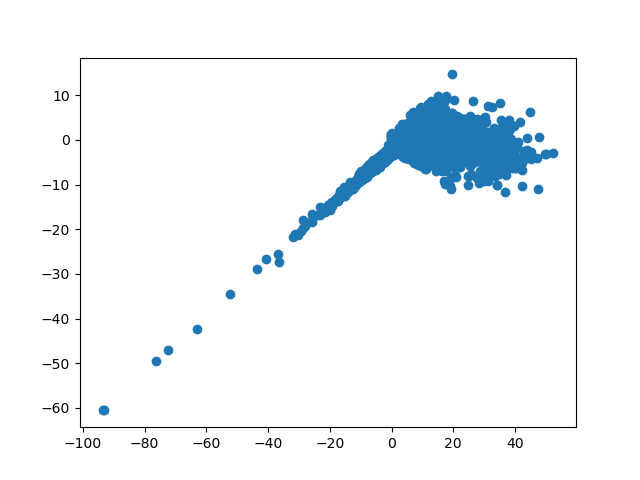

In [26]:
plt.figure()
plt.scatter(outputs_2d[:n,0], outputs_2d[:n,1])

In [30]:
outputs_2d_full = encoder_2d.forward(data_test_full).detach().numpy()

<IPython.core.display.Javascript object>


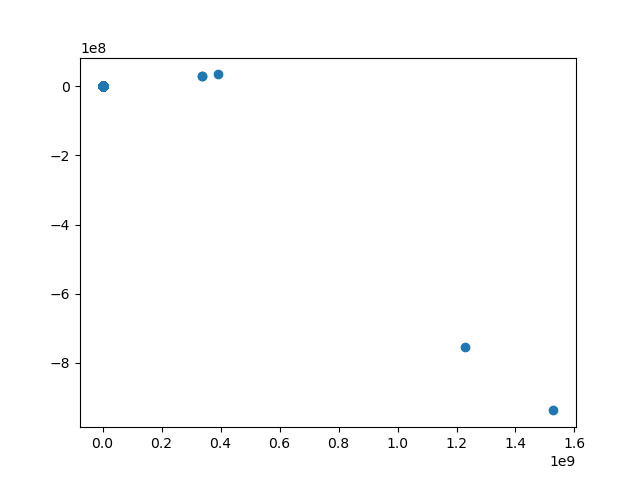

In [32]:
plt.figure()
plt.scatter(outputs_2d_full[:n,0], outputs_2d_full[:n,1])

In [35]:
df  = pd.read_pickle("/share/rcifdata/jbarr/UKAEAGroupProject/data/test_data.pkl")

In [37]:
df.describe()

,Ane,Ate,Autor,Machtor,x,Zeff,gammaE,q,smag,alpha,Ani1,Ati0,normni1,Ti_Te0,logNustar,Target
count,3.339495e+06,3.339495e+06,3.339495e+06,3.339495e+06,3.339495e+06,3.339495e+06,3.339495e+06,3.339495e+06,3.339495e+06,3.339495e+06,3.339495e+06,3.339495e+06,3.339495e+06,3.339495e+06,3.339495e+06,3.339495e+06
mean,3.346844e+00,8.011660e+00,5.459562e-01,1.053272e-01,5.346982e-01,1.844889e+00,5.077907e+03,2.212637e+00,1.029978e+00,3.244506e-01,3.600052e+00,7.453991e+00,1.903933e-02,1.019185e+00,-4.784231e-01,6.616653e-01
std,7.544098e+01,2.399218e+01,2.469088e+00,1.854760e-01,2.665847e-01,6.504638e-01,2.229806e+07,1.228050e+00,1.771504e+00,8.370681e-01,1.975473e+01,4.716084e+01,1.053260e-02,2.216106e-01,4.944099e-01,4.731431e-01
min,-2.104507e+04,-8.557695e+03,-1.849448e+02,-2.921602e-01,2.246824e-02,1.001057e+00,-4.299727e+09,6.446359e-01,-1.465966e+02,-2.225995e+01,-1.074658e+03,-9.524554e+03,4.731857e-06,2.451745e-01,-1.990947e+00,0.000000e+00
25%,2.867085e-01,2.424350e+00,0.000000e+00,0.000000e+00,3.246776e-01,1.334894e+00,0.000000e+00,1.330310e+00,1.227123e-01,5.949192e-02,6.175906e-01,2.670995e+00,1.609759e-02,9.930528e-01,-8.371349e-01,0.000000e+00
50%,1.731745e+00,5.433598e+00,0.000000e+00,0.000000e+00,5.461664e-01,1.746351e+00,0.000000e+00,1.889790e+00,5.492964e-01,1.423735e-01,1.725996e+00,5.550784e+00,1.664689e-02,1.000000e+00,-5.577390e-01,1.000000e+00
75%,3.844875e+00,9.594195e+00,8.007807e-01,1.648038e-01,7.566727e-01,2.175440e+00,0.000000e+00,2.741815e+00,1.419462e+00,3.785337e-01,3.356488e+00,9.207165e+00,1.833734e-02,1.000000e+00,-1.859302e-01,1.000000e+00
max,2.105537e+04,8.059684e+03,1.307951e+02,1.157954e+00,9.541317e-01,1.164230e+01,4.299727e+09,3.189302e+01,4.978162e+02,1.217655e+02,1.200819e+03,9.524554e+03,2.345388e-01,4.985357e+00,3.529977e+00,1.000000e+00
